# Importing libraries

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import dump
from joblib import load
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization

# Reading Datasets

In [2]:
# Readind the merged data of dll and header
df1=pd.read_csv("df_dll_header (2).csv")
df1

,SHA256,Type,advapi32.dll,kernel32.dll,ole32.dll,oleaut32.dll,shlwapi.dll,user32.dll,msvcrt.dll,shell32.dll,...,MajorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,NumberOfRvaAndSizes
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,0,1,1,1,1,1,0,0,0,...,10,6,0,413696,1024,455158,3,33120,1048576,16
1,2a053f32b1d48539e3e2807f86754be87ce95b08378467...,0,1,1,0,0,0,0,0,0,...,10,6,0,249856,1024,143649,3,33088,1048576,16
2,2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...,0,1,1,1,0,0,1,1,1,...,10,10,0,57344,1024,47512,2,49632,524288,16
3,308e8bb2e8a3b67607d2454370e0b50147b42049bda813...,0,1,1,1,1,1,1,0,0,...,6,5,2,94208,1024,97819,2,33088,1048576,16
4,31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...,0,1,1,0,0,0,0,0,0,...,10,6,0,126976,1024,170062,3,33088,1048576,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29492,d1c923ec32d09be96adf3ba85e1855402f782b74437534...,6,0,0,0,0,0,0,0,0,...,0,4,0,974848,512,0,2,34112,1048576,16
29493,d1dfc3203d99c0d54351bebd876762f27c0073e3cfef9a...,6,0,0,0,0,0,0,0,0,...,0,4,0,434176,512,0,2,34112,1048576,16
29494,d1fea52507fc97ff419f8dd2ea8ecf689fb7c066cf8f18...,6,0,0,0,0,0,0,0,0,...,0,4,0,958464,512,0,2,34112,1048576,16
29495,d201d8488d316c9ab7d537545efeda284568a652f23db1...,6,0,0,0,0,0,0,0,0,...,0,4,0,1114112,512,0,2,34112,1048576,16


In [3]:
# Reading the merged data of api and section 
df2=pd.read_csv("api_section_df.csv")
df2

,Type,text_SizeOfRawData,text_PointerToRawData,text_Characteristics,data_SizeOfRawData,data_PointerToRawData,data_Characteristics,rdata_VirtualAddress,rdata_SizeOfRawData,rdata_PointerToRawData,...,playenhmetafile,getwinmetafilebits,getenhmetafilepaletteentries,getenhmetafileheader,getenhmetafilebits,vbaarylock,vbaaryunlock,vbaboolvar,getpolyfillmode,ftol
0,0,114688,4096,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,16896,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,506880,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1314816,4096,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3072,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29497,6,893952,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29498,6,387072,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29499,6,923648,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29500,6,1087488,512,1610612768,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Merging all datasets 
df= pd.merge(df1, df2, on=['SHA256','Type'], how='inner')
df

,SHA256,Type,advapi32.dll,kernel32.dll,ole32.dll,oleaut32.dll,shlwapi.dll,user32.dll,msvcrt.dll,shell32.dll,...,playenhmetafile,getwinmetafilebits,getenhmetafilepaletteentries,getenhmetafileheader,getenhmetafilebits,vbaarylock,vbaaryunlock,vbaboolvar,getpolyfillmode,ftol
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a053f32b1d48539e3e2807f86754be87ce95b08378467...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...,0,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,308e8bb2e8a3b67607d2454370e0b50147b42049bda813...,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29494,d1c923ec32d09be96adf3ba85e1855402f782b74437534...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29495,d1dfc3203d99c0d54351bebd876762f27c0073e3cfef9a...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29496,d1fea52507fc97ff419f8dd2ea8ecf689fb7c066cf8f18...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29497,d201d8488d316c9ab7d537545efeda284568a652f23db1...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Shuffle The data 

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

,SHA256,Type,advapi32.dll,kernel32.dll,ole32.dll,oleaut32.dll,shlwapi.dll,user32.dll,msvcrt.dll,shell32.dll,...,playenhmetafile,getwinmetafilebits,getenhmetafilepaletteentries,getenhmetafileheader,getenhmetafilebits,vbaarylock,vbaaryunlock,vbaboolvar,getpolyfillmode,ftol
0,396cf03c5637b57c3b391d5bb7b8c05fce62d23ee9df51...,3,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,e25d95968d86bd491dadb93ab387142b436770074b879f...,4,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8d26f26e9ed8a476cb2d52a36eb41241b55673c3d565ce...,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2959571d4fc86699b529e04292a031f381f1793cfc079b...,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7eaaa350c08ffaaa620213633fc41835245353763523c9...,3,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Check Balance

In [131]:
class_counts = df['Type'].value_counts()
print(class_counts)


Type
4    5076
1    5022
3    4955
2    4643
5    4227
6    3699
0    1877
Name: count, dtype: int64


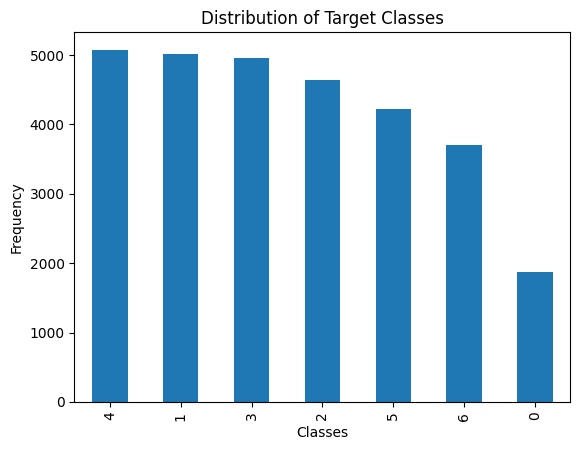

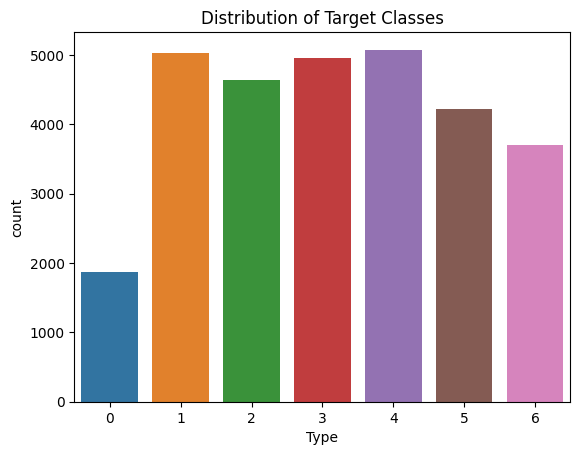

In [132]:
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Target Classes')
plt.show()

sns.countplot(x='Type', data=df)
plt.title('Distribution of Target Classes')
plt.show()


Handle Balance

In [7]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(df.drop('Type', axis=1), df['Type'])

df_ros = pd.DataFrame(X_ros, columns=df.columns[:])
df_ros['Type'] = y_ros


In [8]:
df_ros


,SHA256,Type,advapi32.dll,kernel32.dll,ole32.dll,oleaut32.dll,shlwapi.dll,user32.dll,msvcrt.dll,shell32.dll,...,playenhmetafile,getwinmetafilebits,getenhmetafilepaletteentries,getenhmetafileheader,getenhmetafilebits,vbaarylock,vbaaryunlock,vbaboolvar,getpolyfillmode,ftol
0,396cf03c5637b57c3b391d5bb7b8c05fce62d23ee9df51...,3,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,e25d95968d86bd491dadb93ab387142b436770074b879f...,4,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8d26f26e9ed8a476cb2d52a36eb41241b55673c3d565ce...,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2959571d4fc86699b529e04292a031f381f1793cfc079b...,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7eaaa350c08ffaaa620213633fc41835245353763523c9...,3,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35527,cd2df16a0a21ec9e310f76d3bbd4c21b35ceac54fedb6f...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35528,4ea4984ea96300ac77002b130bba2e22f4e2469dd9d3fa...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35529,855bac33f0a992ba7ab854f25b99a2404b125b999e4ef6...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35530,3a526f88ad49057e96c10cff01a976b6b51a6d5a3d09a1...,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepare the train test split

In [10]:
X = df_ros.drop(['SHA256','Type'],axis=1)
y = df_ros[['Type']]

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Type_encoded= label_encoder.fit_transform(y)

print("Encoded labels:", Type_encoded)


Encoded labels: [3 4 3 ... 6 6 6]


E:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, Type_encoded, test_size=0.2, random_state=42)


# MODEL

# Random forest

In [133]:

model_rf1 = RandomForestClassifier(
    n_estimators=20,      
    max_depth=20,           
    random_state=42,
    max_features='sqrt',    
    min_samples_leaf=1,     
    min_samples_split=2,
)

model_rf1.fit(X_train, y_train)

y_train_pred_rf1 = model_rf1.predict(X_train)
y_pred_test_rf1 = model_rf1.predict(X_test)

train_acc_rf1 = accuracy_score(y_train, y_train_pred_rf1)
test_acc_rf1 = accuracy_score(y_test, y_pred_test_rf1)

print(f"Training Accuracy: {train_acc_rf1}")
print(f"Test Accuracy: {test_acc_rf1}")


Training Accuracy: 0.9238698328935796
Test Accuracy: 0.8781483044885324


In [134]:

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_pred_test_rf1))


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1027
           1       0.95      0.94      0.95      1013
           2       1.00      0.99      0.99       976
           3       0.91      0.80      0.85      1011
           4       0.94      0.85      0.89      1070
           5       0.81      0.66      0.72       996
           6       0.66      0.94      0.77      1014

    accuracy                           0.88      7107
   macro avg       0.89      0.88      0.88      7107
weighted avg       0.89      0.88      0.88      7107



In [135]:
# dump(model_rf1,'Randomforest_oversample_1.joblib')

In [136]:
# Randomforest_oversample_1=load('Randomforest_oversample_1.joblib')

In [137]:
# Randomforest_oversample_1

# XGBOOST Model

In [26]:

Xgb_model = xgb.XGBClassifier(
    max_depth=10,
    n_estimators=30,
    learning_rate=0.08,
    gamma=0.1,
    min_child_weight=2,
    objective='multi:softmax',
    random_state=42
)

Xgb_model.fit(X_train, y_train)

y_pred_train = Xgb_model.predict(X_train)
y_pred_test = Xgb_model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Training Accuracy: 0.9202110817941952
Test Accuracy: 0.8833544392852117


In [27]:
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_pred_test))

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1027
           1       0.93      0.94      0.94      1013
           2       0.99      0.98      0.99       976
           3       0.94      0.80      0.86      1011
           4       0.93      0.86      0.90      1070
           5       0.81      0.68      0.74       996
           6       0.68      0.94      0.79      1014

    accuracy                           0.88      7107
   macro avg       0.89      0.88      0.88      7107
weighted avg       0.89      0.88      0.88      7107



In [138]:
# dump(model,'xgboost_oversample_1.joblib')

In [139]:
# xgboost_oversample_1=load('xgboost_oversample_1.joblib')

In [140]:
# xgboost_oversample_1

# Decision Tree Model

In [115]:
dt_classifier = DecisionTreeClassifier(max_depth=20,min_samples_split=5,min_samples_leaf=5, random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_test_dt = dt_classifier.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_pred_test_dt))
print(classification_report(y_test, y_pred_test_dt))


Accuracy:  0.881384550443225
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1027
           1       0.93      0.94      0.93      1013
           2       0.98      0.98      0.98       976
           3       0.86      0.81      0.84      1011
           4       0.92      0.87      0.90      1070
           5       0.76      0.76      0.76       996
           6       0.76      0.83      0.80      1014

    accuracy                           0.88      7107
   macro avg       0.88      0.88      0.88      7107
weighted avg       0.88      0.88      0.88      7107



In [116]:
y_pred_train_dt = dt_classifier.predict(X_train)

print('Accuracy: ', accuracy_score(y_train,y_pred_train_dt))
print(classification_report(y_train, y_pred_train_dt))

Accuracy:  0.9311169744942832
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4049
           1       0.95      0.97      0.96      4063
           2       0.99      0.99      0.99      4100
           3       0.92      0.89      0.90      4065
           4       0.95      0.91      0.93      4006
           5       0.88      0.86      0.87      4080
           6       0.86      0.91      0.88      4062

    accuracy                           0.93     28425
   macro avg       0.93      0.93      0.93     28425
weighted avg       0.93      0.93      0.93     28425



# MLP Model

In [124]:

mlp_model = tf.keras.Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  
])

optmizer = Adam(learning_rate=0.0001)

mlp_model.compile(loss='categorical_crossentropy', optimizer=optmizer, metrics=['accuracy'])

num_epochs = 100

y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)

history = mlp_model.fit(X_train, y_train_encoded, epochs=num_epochs, batch_size=32, verbose=1, validation_split=0.2)


y_pred = mlp_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_classes, y_pred_classes))


Epoch 1/100
711/711 [==============================] - 11s 13ms/step - loss: 1.5294 - accuracy: 0.3946 - val_loss: 1.1626 - val_accuracy: 0.5261
Epoch 2/100
711/711 [==============================] - 8s 11ms/step - loss: 1.2119 - accuracy: 0.5221 - val_loss: 1.0267 - val_accuracy: 0.5743
Epoch 3/100
711/711 [==============================] - 8s 11ms/step - loss: 1.1081 - accuracy: 0.5544 - val_loss: 0.9812 - val_accuracy: 0.5938
Epoch 4/100
711/711 [==============================] - 8s 11ms/step - loss: 1.0518 - accuracy: 0.5756 - val_loss: 0.9572 - val_accuracy: 0.6222
Epoch 5/100
711/711 [==============================] - 7s 11ms/step - loss: 1.0252 - accuracy: 0.5924 - val_loss: 0.9489 - val_accuracy: 0.6142
Epoch 6/100
711/711 [==============================] - 8s 11ms/step - loss: 0.9925 - accuracy: 0.6051 - val_loss: 0.9202 - val_accuracy: 0.6084
Epoch 7/100
711/711 [==============================] - 8s 11ms/step - loss: 0.9823 - accuracy: 0.6079 - val_loss: 0.9256 - val_accuracy

Final Training Accuracy: 74.16%
Final Validation Accuracy: 73.74%


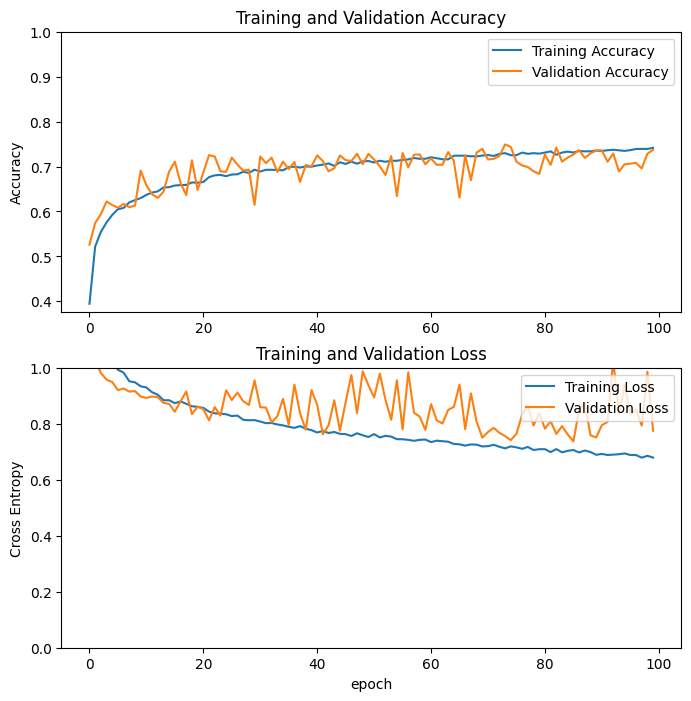

In [125]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

print(f"Final Training Accuracy: {acc[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1]*100:.2f}%")


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Ensemble model 

In [142]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(
    max_depth=10,
    n_estimators=30,
    learning_rate=0.08,
    gamma=0.1,
    min_child_weight=2,
    objective='multi:softmax',
    random_state=42)

tree_model = DecisionTreeClassifier(max_depth=20,min_samples_split=5,min_samples_leaf=5, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=20,      
    max_depth=20,           
    random_state=42,
    max_features='sqrt',    
    min_samples_leaf=1,     
    min_samples_split=2,)


ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('tree', tree_model), ('rf', rf_model)],
    voting='hard'
)

ensemble_model.fit(X_train_scaled, y_train)

y_pred_test = ensemble_model.predict(X_test_scaled)
accuracy_ensemble_test = accuracy_score(y_test, y_pred_test)

print("Accuracy of the ensemble model:", accuracy_ensemble_test)


Accuracy of the ensemble model: 0.8895455185028844


In [143]:
y_pred_train = ensemble_model.predict(X_train_scaled)
accuracy_ensemble_train = accuracy_score(y_train, y_pred_train)

print("Accuracy of the ensemble model:", accuracy_ensemble_train)

Accuracy of the ensemble model: 0.930976253298153
